In [12]:
import matplotlib.pyplot as plt

In [2]:
def dataFolder(p, split):

  # we will create a training folder

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+ "/" +dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir))  , 
                                size = (math.floor(split*number_of_images[dir])-5), 
                                replace =False ):
        O = os.path.join(ROOT_DIR, dir,img) 
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print( f"{p} Folder exsist ")

In [3]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator


# Define the input shape of the images
input_shape = (224, 224, 3)


train_acc = []
val_acc = []
train_loss = []
val_loss = []


# Load the VGG16 model without the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top (classification) layer to the model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model and the custom top layer into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with binary cross-entropy loss and the Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the training and validation data generators
train_dir = "D://college project//Cervical Cancer Detection"
val_dir = "D://college project//val"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='binary')

# Train the model on the data generators
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=train_generator.samples/train_generator.batch_size,
#         epochs=10,
#         validation_data=val_generator,
#         validation_steps=val_generator.samples/val_generator.batch_size)


history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

train_acc.extend(history.history['accuracy'])
val_acc.extend(history.history['val_accuracy'])
train_loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])
print(train_acc)



Found 852 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


C:\Users\suman\AppData\Local\Temp\ipykernel_10364\2686664729.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
26/26 [==============================] - 95s 4s/step - loss: 0.9964 - accuracy: 0.7220 - val_loss: 0.3872 - val_accuracy: 0.8906
Epoch 2/10
26/26 [==============================] - 99s 4s/step - loss: 0.3698 - accuracy: 0.8390 - val_loss: 0.4271 - val_accuracy: 0.7500
Epoch 3/10
26/26 [==============================] - 103s 4s/step - loss: 0.2604 - accuracy: 0.8866 - val_loss: 0.3092 - val_accuracy: 0.7969
Epoch 4/10
26/26 [==============================] - 102s 4s/step - loss: 0.2190 - accuracy: 0.9147 - val_loss: 0.2890 - val_accuracy: 0.8125
Epoch 5/10
26/26 [==============================] - 105s 4s/step - loss: 0.1645 - accuracy: 0.9390 - val_loss: 0.1360 - val_accuracy: 0.9844
Epoch 6/10
26/26 [==============================] - 102s 4s/step - loss: 0.1372 - accuracy: 0.9585 - val_loss: 0.1891 - val_accuracy: 0.8906
Epoch 7/10
26/26 [==============================] - 105s 4s/step - loss: 0.1188 - accuracy: 0.9671 - val_loss: 0.1253 - val_accuracy: 0.9844
Epoch 8/10
26/2

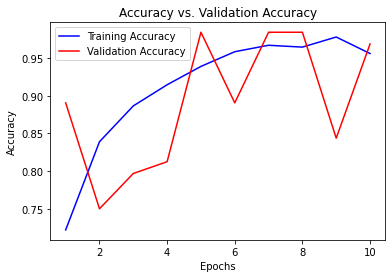

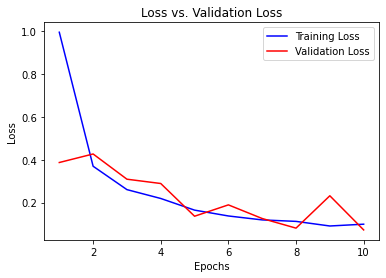

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(range(1, len(train_acc) + 1), train_acc, 'b', label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# # Plot loss
plt.plot(range(1, len(train_loss) + 1), train_loss, 'b', label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, 'r', label='Validation Loss')
plt.title('Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Check on single image

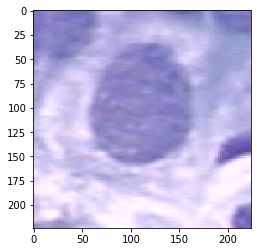

1/1 [==============================] - 0s 238ms/step
not cancerous


In [5]:
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image

# Load the image using PIL
img_path = "D:/college project/Cervical Cancer Detection/Non- Cancerous/153956040-153956058-002.bmp" 


# path="/content/test/Cancerous/148848523-148848559-004-d.bmp"

img = load_img(img_path, target_size = (224,224))

input_arr = img_to_array(img)/255


plt.imshow(input_arr)
plt.show()


with Image.open(img_path) as img:
    img = img.convert('RGB')  # Convert to RGB format if necessary
    img = img.resize((224, 224))  # Resize to match the input shape of your model
    img_array = img_to_array(img)

# Reshape and preprocess the image data
img_array = img_array.reshape((1,) + img_array.shape)
img_array = img_array / 255.0 # Assuming you used normalization during training

# Get the prediction from the model
prediction = model.predict(img_array)
# print(prediction[0][0])
# Convert the binary prediction to a human-readable result
if prediction > 0.5:
    result = 'not cancerous'
else:
    result = 'cancerous'
print(result)

In [6]:
# Load the test data
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "D://college project//val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

Found 80 images belonging to 2 classes.
3/3 [==============================] - 9s 3s/step - loss: 0.0757 - accuracy: 0.9750
Test accuracy: 0.9750000238418579
